# EDA on Combined Bee Population and Air Quality Data

This notebook focuses on the exploratory data analysis (EDA) of a merged dataset comprising bee population statistics and air quality measurements over a span of several years. The combined dataset integrates information from bee population surveys conducted between 1987 and 2017 with air quality data spanning from 1980 to 2023. For the purpose of this analysis, the overlapping years of 1987 to 2017 will be examined in detail.

The EDA aims to uncover inherent patterns and relationships within the merged dataset, leveraging both traditional statistical methods for predictive modeling and time series analysis techniques. Ultimately, the insights gleaned from this exploration will inform the development of forecasting models to understand and potentially predict trends in bee populations in relation to air quality dynamics.


| DataFrame | Contents (by state and year)       | Rows  | Columns | Non-Null Count |
|-----------|-----------------------------------|-------|---------|----------------|
| df1       | Bee Population Survey             | 1343  | 3       | 1343           |
| df2       | Air Quality Data                  | 40495 | 18      | 40495          |
|           |                                   |       |         |                |


---

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

---
## Loading in bee population, and airquality data; and extracting essential insights from the data frames. 

In [2]:
# Data frame for bee colonies
df1= pd.read_csv('./Data_Bees/processed_dfs/state_survey_processed.csv', index_col = None)
df1.drop(columns = ['Unnamed: 0'], inplace = True)
df1.head(2)

,Year,State,Value
0,1987,alabama,46000
1,1987,arizona,80000


In [3]:
# Data frame for air quality
df2 = pd.read_csv('./data/air_quality_master.csv')
df2.drop(columns = ['Unnamed: 0'], inplace = True)
df2.head(2)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,alabama,cullman,1985,214,144,59,11,0,0,0,150,87,44,0,0,214,0,0
1,alabama,etowah,1985,282,176,81,23,2,0,0,154,97,45,0,0,257,0,25


### Summary Statistics

In [4]:
# bee data frame statistics
df1.describe()

,Year,Value
count,1343.000000,1.343000e+03
mean,2001.618019,8.409993e+04
std,9.074253,2.149854e+05
min,1987.000000,1.000000e+03
25%,1994.000000,1.100000e+04
50%,2001.000000,3.300000e+04
75%,2009.000000,8.000000e+04
max,2017.000000,4.235000e+06


In [5]:
# airquality data frame statistics
df2.describe()

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000,40495.000000
mean,2003.711866,275.543203,204.388048,59.073318,8.956192,2.503272,0.588171,0.034202,138.499272,69.140536,37.323225,13.144462,18.523250,157.945672,65.287122,20.642697
std,11.655073,111.009672,94.705477,50.206079,13.583630,6.480031,4.615986,0.602706,229.859939,29.164920,12.834691,48.646584,52.515509,121.760169,95.004290,54.752660
min,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,203.000000,126.000000,21.000000,0.000000,0.000000,0.000000,0.000000,90.000000,50.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,349.000000,217.000000,50.000000,3.000000,0.000000,0.000000,0.000000,126.000000,64.000000,38.000000,0.000000,0.000000,177.000000,0.000000,0.000000
75%,2014.000000,365.000000,286.000000,83.000000,13.000000,2.000000,0.000000,0.000000,169.000000,84.000000,44.000000,0.000000,0.000000,243.000000,110.000000,12.000000
max,2023.000000,366.000000,366.000000,339.000000,170.000000,114.000000,160.000000,37.000000,20646.000000,542.000000,192.000000,366.000000,366.000000,366.000000,366.000000,366.000000


---
### Data types and columns

In [6]:
# basic information for bees data frame
print(df1.info())
print('='*40)
# basic information for airquality data frame
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    1343 non-null   int64 
 1   State   1343 non-null   object
 2   Value   1343 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 31.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40495 entries, 0 to 40494
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                40495 non-null  object
 1   County                               40495 non-null  object
 2   Year                                 40495 non-null  int64 
 3   Days with AQI                        40495 non-null  int64 
 4   Good Days                            40495 non-null  int64 
 5   Moderate Days                        40495 non-null  int64 
 6   Unhealthy for Sensitive 

---
### Creating a combined data frame

In [7]:
# Got help from Emily Rogalski. 
# Solution: I needed to include 'numeric_only' in .mean() 

# Group by 'State' and 'Year' and calculate the mean for each numeric column
df2 = df2.groupby(['State', 'Year']).mean(numeric_only = True).reset_index()

# Merging df1 and df2
df = pd.merge(df1, df2, on=['Year', 'State']) 

# Renaming 'Value' to a more informative name
df.rename(columns = {'Value': 'Bee Colonies'})
df['State'] = df['State'].str.capitalize()
df.head(2)

,Year,State,Value,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,1987,Alabama,46000,230.571429,130.714286,66.428571,24.428571,7.857143,1.142857,0.0,170.285714,107.571429,46.285714,13.428571,0.0,181.142857,0.0,36.0
1,1987,Arizona,80000,162.100000,88.700000,60.500000,11.900000,1.000000,0.000000,0.0,127.100000,76.400000,42.600000,40.800000,6.1,79.200000,0.0,36.0


---
### Summary Statistics

In [8]:
df.describe()

,Year,Value,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,1343.000000,1.343000e+03,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000,1343.000000
mean,2001.618019,8.409993e+04,262.039822,196.861432,54.902279,7.849240,2.011748,0.391453,0.023671,128.476460,66.109201,35.582543,12.306523,18.402389,144.346255,57.884722,29.099934
std,9.074253,2.149854e+05,58.022262,51.799179,25.678892,7.529023,3.219817,1.297739,0.136236,46.224881,18.480437,7.209434,20.823899,23.768958,65.168610,65.502400,31.662780
min,1987.000000,1.000000e+03,50.263158,43.894737,0.500000,0.000000,0.000000,0.000000,0.000000,42.500000,27.333333,14.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,1.100000e+04,221.880000,157.957071,36.833333,1.640873,0.106203,0.000000,0.000000,99.976190,52.908120,30.622845,0.069366,1.951190,99.157895,1.609579,5.827778
50%,2001.000000,3.300000e+04,263.000000,195.090909,53.277778,5.437500,0.600000,0.000000,0.000000,122.187500,62.333333,36.194444,2.769231,7.833333,145.678571,44.250000,18.209302
75%,2009.000000,8.000000e+04,305.742105,233.013072,71.799242,12.062261,2.333333,0.176471,0.000000,149.870833,77.518293,40.299663,16.330303,26.992788,191.447917,92.177900,40.220000
max,2017.000000,4.235000e+06,364.666667,350.800000,130.666667,36.910714,20.666667,15.333333,2.642857,622.436364,164.666667,54.096774,153.437500,131.862069,326.000000,326.333333,182.500000


---
### Data types and columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 1343 non-null   int64  
 1   State                                1343 non-null   object 
 2   Value                                1343 non-null   int64  
 3   Days with AQI                        1343 non-null   float64
 4   Good Days                            1343 non-null   float64
 5   Moderate Days                        1343 non-null   float64
 6   Unhealthy for Sensitive Groups Days  1343 non-null   float64
 7   Unhealthy Days                       1343 non-null   float64
 8   Very Unhealthy Days                  1343 non-null   float64
 9   Hazardous Days                       1343 non-null   float64
 10  Max AQI                              1343 non-null   float64
 11  90th Percentile AQI           

---
### Setup data as a pandas datatime for 'Year'

In [10]:
# df.index = pd.to_datetime(df.index.strftime('%Y')) didn't work

# Make 'Year' the index column
# df.index = pd.to_datetime(df['Year'], format='%Y').strftime('%Y')

df['Year'] = pd.to_datetime(df['Year'], format = '%Y')
df.set_index('Year', inplace = True)
df.index = df.index.strftime('%Y')
# Renaming 'Value' to a more informative name
df.rename(columns = {'Value': 'Bee Colonies'}, inplace = True)

In [11]:
df.head()

,State,Bee Colonies,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
Year,,,,,,,,,,,,,,,,,
1987,Alabama,46000,230.571429,130.714286,66.428571,24.428571,7.857143,1.142857,0.000000,170.285714,107.571429,46.285714,13.428571,0.000000,181.142857,0.0,36.000000
1987,Arizona,80000,162.100000,88.700000,60.500000,11.900000,1.000000,0.000000,0.000000,127.100000,76.400000,42.600000,40.800000,6.100000,79.200000,0.0,36.000000
1987,Arkansas,29000,184.000000,136.333333,35.333333,8.666667,3.666667,0.000000,0.000000,101.333333,64.000000,31.666667,0.000000,16.666667,101.666667,0.0,65.666667
1987,California,540000,302.163265,168.612245,74.918367,29.591837,17.551020,11.469388,0.020408,186.142857,110.979592,53.102041,30.571429,63.469388,190.734694,0.0,17.387755
1987,Colorado,44000,222.000000,134.388889,74.888889,10.500000,1.777778,0.444444,0.000000,119.888889,70.333333,38.333333,46.388889,25.055556,107.666667,0.0,42.888889


In [12]:
# filtering df to show only CO, NO2, Ozone

df_gases = df[['Days CO', 'Days NO2', 'Days Ozone', 'State', 'Good Days', 'Unhealthy Days', 'Days PM10', 'Days PM2.5', 'Bee Colonies']]

In [13]:
df_gases.head()

,Days CO,Days NO2,Days Ozone,State,Good Days,Unhealthy Days,Days PM10,Days PM2.5,Bee Colonies
Year,,,,,,,,,
1987,13.428571,0.000000,181.142857,Alabama,130.714286,7.857143,36.000000,0.0,46000
1987,40.800000,6.100000,79.200000,Arizona,88.700000,1.000000,36.000000,0.0,80000
1987,0.000000,16.666667,101.666667,Arkansas,136.333333,3.666667,65.666667,0.0,29000
1987,30.571429,63.469388,190.734694,California,168.612245,17.551020,17.387755,0.0,540000
1987,46.388889,25.055556,107.666667,Colorado,134.388889,1.777778,42.888889,0.0,44000


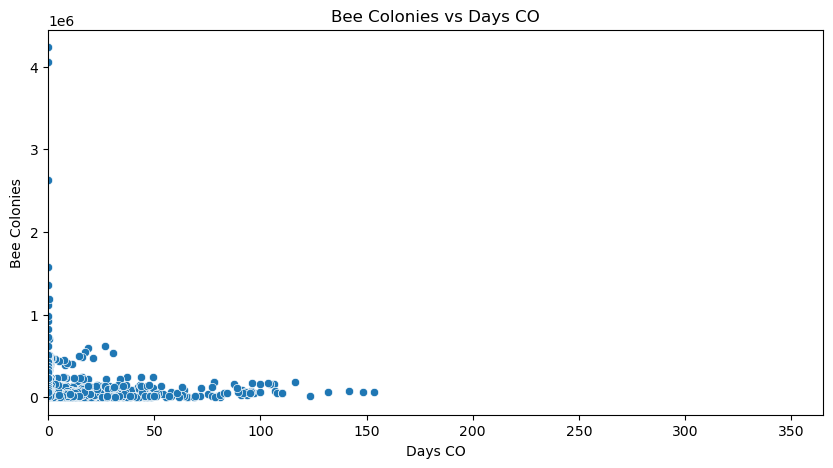

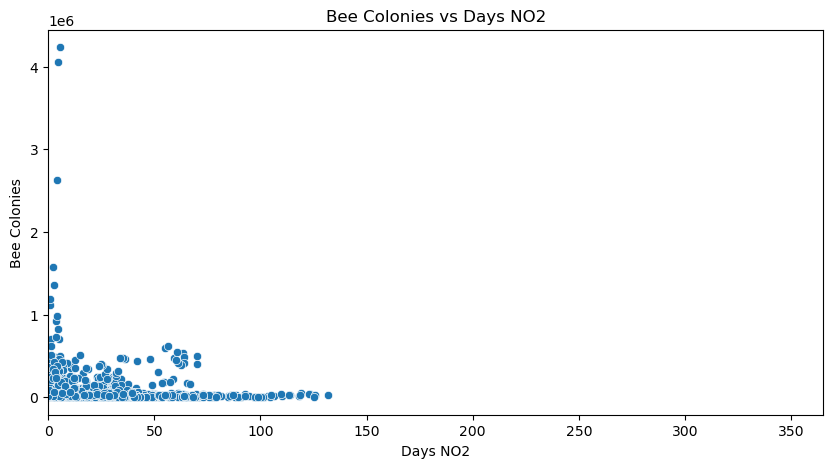

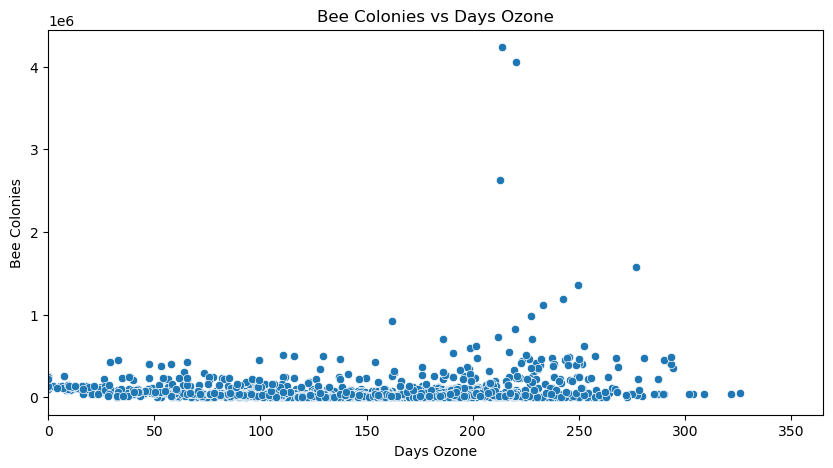

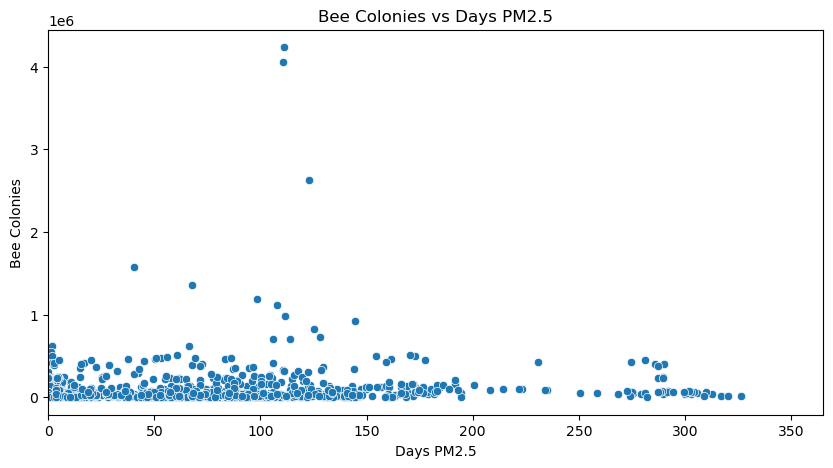

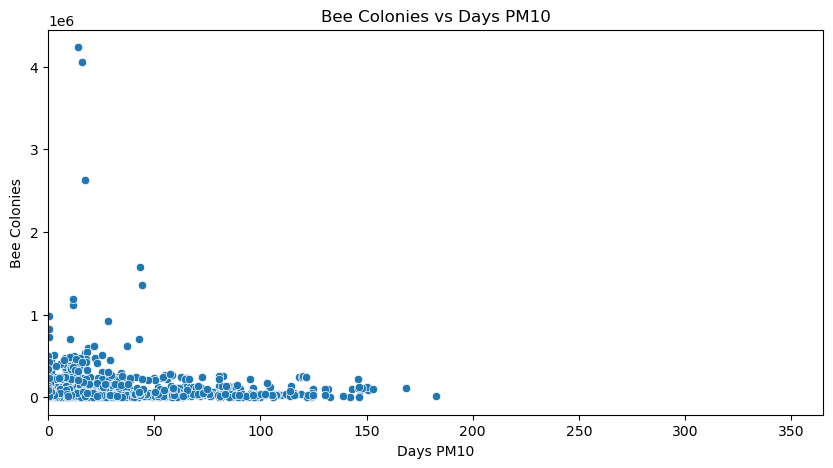

In [14]:
pollutants = ['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']
for pollutant in pollutants:
    plt.figure(figsize=(10, 5))
    sns.scatterplot( x = df_gases[pollutant], y=df_gases['Bee Colonies'])
    plt.title(f'Bee Colonies vs {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Bee Colonies')
    plt.xlim(0, 365)
# there tend to be higher number of bee colonies for states that have lower numbers of 'days CO'

In [15]:
df_gases.head()

,Days CO,Days NO2,Days Ozone,State,Good Days,Unhealthy Days,Days PM10,Days PM2.5,Bee Colonies
Year,,,,,,,,,
1987,13.428571,0.000000,181.142857,Alabama,130.714286,7.857143,36.000000,0.0,46000
1987,40.800000,6.100000,79.200000,Arizona,88.700000,1.000000,36.000000,0.0,80000
1987,0.000000,16.666667,101.666667,Arkansas,136.333333,3.666667,65.666667,0.0,29000
1987,30.571429,63.469388,190.734694,California,168.612245,17.551020,17.387755,0.0,540000
1987,46.388889,25.055556,107.666667,Colorado,134.388889,1.777778,42.888889,0.0,44000
